In [1]:
%reset

# 1. Imports

In [1]:
import mne
import time
import os
import numpy as np
import custom_modules.xdf_to_fif_converter as xtfc
import custom_modules.preprocessing_ptu as prep
import custom_modules.file_handling as  fh

import importlib
importlib.reload(xtfc)
importlib.reload(prep)
importlib.reload(fh)

<module 'custom_modules.file_handling' from 'C:\\Users\\peter\\Documents\\Code\\master-thesis\\03_analysis\\custom_modules\\file_handling.py'>

In [2]:
mne.__version__

'1.3.1'

# 2. Constants

In [2]:
data_path = 'D:/Diplomarbeit_data/eeg/'
# subjects = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07' , 'A08', 'A10']
subjects = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07' , 'A08', 'A09', 'A10']
trial_type_markers = ['LTR-s', 'LTR-l','RTL-s', 'RTL-l', 'TTB-s', 'TTB-l', 'BTT-s', 'BTT-l']

mne.set_log_level('INFO') #'INFO' 'WARNING'

# 3. XDF --> FIF
The following cell reads all xdf-files containing the raw eeg and loads them into the mne structure and stores them as .fif-files.

In [4]:
help(xtfc.xdf_to_fif)

Help on function xdf_to_fif in module custom_modules.xdf_to_fif_converter:

xdf_to_fif(src, dst, sbj)
    Convert .xdf files to .fif files for a given subject.
    
    :param src: str, path of the folder containing .xdf files.
    :param dst: str, path of the folder where to save the .fif files.
    :param sbj: str, subject identifier.



In [5]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='raw', dst_fldr='raw_fif')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Extracting subject {subject}', end=' ')

    # Call the xdf_to_fif function from the xtfc module which takes care of converting the xdf files to fif files:
    xtfc.xdf_to_fif(src_path, dst_path, subject)

    print()

print(f'Finished reading, took me {round(time.time()-start)} seconds...')

Extracting subject A01 # # # # # # # # # # # 
Extracting subject A02 # # # # # # # # # # # 
Extracting subject A03 # # # # # # # # # # # 
Extracting subject A04 # # # # # # # # # # # 
Extracting subject A05 # # # # # # # # # # # 
Extracting subject A06 # # # # # # # # # # # 
Extracting subject A07 # # # # # # # # # # # 
Extracting subject A08 # # # # # # # # # # # 
Extracting subject A09 # # # # # # # # # # # 
Extracting subject A10 # # # # # # # # # # # 
Finished reading, took me 78 seconds...


# 4. Concatenate all fif files for each subject

In [8]:
help(prep.concat_fifs)

Help on function concat_fifs in module custom_modules.preprocessing_ptu:

concat_fifs(src, dst, sbj, paradigm='paradigm')
    Concatenates multiple raw.fif files from a single subject and paradigm.
    
    :param src: str, path to the directory containing the input raw.fif files.
    :param dst: str, path to the directory where the concatenated raw.fif file will be stored.
    :param sbj: str, subject name contained in the file names.
    :param paradigm: str, paradigm name contained in the file names (default is 'paradigm').
    :return: None
    
    - Searches for all the files in the source directory containing the subject name, 'raw.fif' and the specified
     paradigm.
    - Reads each of the selected raw.fif files using MNE-Python's read_raw function.
    - Concatenates the read files into a single raw object using MNE-Python's concatenate_raws function.
    - Saves the concatenated raw object as a new raw.fif file in the destination directory.



In [9]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='raw_fif', dst_fldr='2023_04_18_concat')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Reading all fif files for subject {subject}', end=' ')

    # Concatenate all raw files for the paradigm and the eye paradigm:
    prep.concat_fifs(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')
    prep.concat_fifs(src=src_path, dst=dst_path, sbj=subject, paradigm='eye')
    print()

print(f'Finished concatenating, took me {round(time.time() - start)} seconds...')

Reading all fif files for subject A01 # # # # # # # # # # # 
Reading all fif files for subject A02 # # # # # # # # # # # 
Reading all fif files for subject A03 # # # # # # # # # # # 
Reading all fif files for subject A04 # # # # # # # # # # # 
Reading all fif files for subject A05 # # # # # # # # # # # 
Reading all fif files for subject A06 # # # # # # # # # # # 
Reading all fif files for subject A07 # # # # # # # # # # # 
Reading all fif files for subject A08 # # # # # # # # # # # 
Reading all fif files for subject A09 # # # # # # # # # # # 
Reading all fif files for subject A10 # # # # # # # # # # # 
Finished concatenating, took me 31 seconds...


# 5. Filter  the data (HP 0.4 Hz and Notch 50 Hz)

In [10]:
help(prep.filter_fifs)

Help on function filter_fifs in module custom_modules.preprocessing_ptu:

filter_fifs(src, dst, sbj, paradigm='paradigm')
    Applies highpass and notch filters to a single raw EEG data file, and saves the filtered data in a new file.
    
    :param src: The directory path containing the original raw EEG data file.
    :type src: str
    
    :param dst: The directory path where the filtered EEG data file will be stored.
    :type dst: str
    
    :param sbj: The subject identifier for the raw EEG data file.
    :type sbj: str
    
    :param paradigm: The task identifier for the raw EEG data file. Default is 'paradigm'.
    :type paradigm: str
    
    :return: None
    :rtype: None



In [15]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_04_18_concat', dst_fldr='2023_05_19_temp')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Filtering raw EEG for subject {subject}')

    # Concatenate all raw files for the paradigm and the eye paradigm:
    prep.filter_fifs(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')
    prep.filter_fifs(src=src_path, dst=dst_path, sbj=subject, paradigm='eye')

print(f'Finished filtering, took me {round(time.time() - start)} seconds...')

Filtering raw EEG for subject A01
Opening raw data file D:/Diplomarbeit_data/eeg/2023_04_18_concat/A01_paradigm_concatenated_raw.fif...
    Range : 1131211 ... 1928726 =   5656.055 ...  9643.630 secs
Ready.
Reading 0 ... 797515  =      0.000 ...  3987.575 secs...
Filtering raw data in 9 contiguous segments
Setting up high-pass filter at 0.4 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 0.40 Hz: -6.02 dB

Setting up band-stop filter from 49 - 51 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 49.38, 50.62 Hz: -6.02, -6.02 dB

Overwriting existing file.
Writing D:\Diplomarbeit_data\eeg\2023_05_19_temp\A01_paradigm_highpass_notch_filtered_raw.fif
Closing D:\Diplomarbeit_data\eeg\2023_05_19_temp\A

In [8]:
# load raw for subj a09:
f_name1 = 'D:/Diplomarbeit_data/eeg/2023_05_19_temp/A02_paradigm_highpass_notch_filtered_raw.fif'
f_name2 = 'D:/Diplomarbeit_data/eeg/2023_03_22_filtered/A02_paradigm_highpass_notch_filtered_raw.fif'
raw1 = mne.io.read_raw(f_name1, preload=True)
raw2 = mne.io.read_raw(f_name1, preload=True)

Opening raw data file D:/Diplomarbeit_data/eeg/2023_05_19_temp/A02_paradigm_highpass_notch_filtered_raw.fif...
    Range : 7683 ... 794898 =     38.415 ...  3974.490 secs
Ready.
Reading 0 ... 787215  =      0.000 ...  3936.075 secs...
Opening raw data file D:/Diplomarbeit_data/eeg/2023_05_19_temp/A02_paradigm_highpass_notch_filtered_raw.fif...
    Range : 7683 ... 794898 =     38.415 ...  3974.490 secs
Ready.
Reading 0 ... 787215  =      0.000 ...  3936.075 secs...


In [16]:
data1 = raw1.get_data() * 1e6
data2 = raw2.get_data() * 1e6

diff = data1 - data2
arr = np.nonzero(diff)

# 6. Interpolate bad channels

In this cell the bad channels are interpolated based on visual inspection. The visual inspection was performed prior and the channels are stored in ***/dataframes/preprocessing/bad_channels.csv***

In [12]:
help(prep.interpolate_bads)

Help on function interpolate_bads in module custom_modules.preprocessing_ptu:

interpolate_bads(src, dst, sbj, paradigm='paradigm')
    Interpolates bad channels in the raw data file for a given subject and saves the interpolated raw file.
    
    :param src: The path to the directory containing the raw data files.
    :type src: str
    :param dst: The path to the directory where the interpolated raw file will be saved.
    :type dst: str
    :param sbj: The subject identifier for the data file to be interpolated.
    :type sbj: str
    :param paradigm: The paradigm identifier for the data file to be interpolated. Default is 'paradigm'.
    :type paradigm: str
    :return: None



In [13]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_04_18_filtered', dst_fldr='2023_04_18_bad_ch_interpolated')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Interpolating bad channels for subject {subject}')

    # Interpolate bad channels for all raw files for the paradigm and the eye paradigm:
    prep.interpolate_bads(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')
    prep.interpolate_bads(src=src_path, dst=dst_path, sbj=subject, paradigm='eye')

print(f'Finished interpolating, took me {round(time.time() - start)} seconds...')

Interpolating bad channels for subject A01
['PO8', 'T8', 'O1', 'PO4', 'TP8', 'Pz']
['PO8', 'T8', 'O1', 'PO4', 'TP8', 'Pz']
Interpolating bad channels for subject A02
['PO10', 'TP8', 'T7', 'FC3', 'PO4']
['PO10', 'TP8', 'T7', 'FC3', 'PO4']
Interpolating bad channels for subject A03
['PO3']
['PO3']
Interpolating bad channels for subject A04
['T7', 'PO10', 'T8', 'Fp1', 'Fp2', 'AF7']
['T7', 'PO10', 'T8', 'Fp1', 'Fp2', 'AF7']
Interpolating bad channels for subject A05
['O1', 'P6', 'Oz', 'AF7', 'Fp1', 'Fp2', 'PO7', 'T8', 'O2', 'AF3', 'AF4', 'AF8']
['O1', 'P6', 'Oz', 'AF7', 'Fp1', 'Fp2', 'PO7', 'T8', 'O2', 'AF3', 'AF4', 'AF8']
Interpolating bad channels for subject A06
['FCz', 'Oz', 'F7', 'TP7', 'PO9', 'O1']
['FCz', 'Oz', 'F7', 'TP7', 'PO9', 'O1']
Interpolating bad channels for subject A07
['T7', 'T8', 'FT8', 'FC6', 'C6', 'P8']
['T7', 'T8', 'FT8', 'FC6', 'C6', 'P8']
Interpolating bad channels for subject A08
['T7', 'T8', 'FT8', 'C5']
['T7', 'T8', 'FT8', 'C5']
Interpolating bad channels for sub

# 7. Eyesub

In [14]:
# Apply the eyesub matrices:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_04_18_bad_ch_interpolated', dst_fldr='2023_04_18_eyesubed')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Fitting eye subtraction for subject {subject}')

    # Interpolate bad channels for all raw files for the paradigm and the eye paradigm:
    prep.fit_sgeyesub(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished sgeyesub fitting, took me {round(time.time() - start)} seconds...')


Fitting eye subtraction for subject A01
Fitting eye subtraction for subject A02
Fitting eye subtraction for subject A03
Fitting eye subtraction for subject A04
Fitting eye subtraction for subject A05
Fitting eye subtraction for subject A06
Fitting eye subtraction for subject A07
Fitting eye subtraction for subject A08
Fitting eye subtraction for subject A09
Fitting eye subtraction for subject A10
Finished sgeyesub fitting, took me 24 seconds...


In [17]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_24_car_filtered_test', dst_fldr='2023_03_22_car_filtered')

# load raw for subj a09:
f_name = [f for f in os.listdir(src_path) if ('A02' in f) and ('paradigm' in f)][0]
file = src_path + '/' + f_name
raw_eyesubed = mne.io.read_raw(file, preload=True)

src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_car_filtered', dst_fldr='2023_03_22_car_filtered')

# load raw for subj a09:
f_name = [f for f in os.listdir(src_path) if ('A02' in f) and ('paradigm' in f)][0]
file = src_path + '/' + f_name
raw = mne.io.read_raw(file, preload=True)

In [18]:
raw.plot(title='Orig')
raw_eyesubed.plot(title='Modified Eyesub')

# 7. CAR

In [15]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_04_18_eyesubed', dst_fldr='2023_04_18_car_filtered')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Re-referencing for subject {subject}')

    # Concatenate all raw files for the paradigm:
    prep.car(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished interpolating, took me {round(time.time() - start)} seconds...')

Re-referencing for subject A01
Re-referencing for subject A02
Re-referencing for subject A03
Re-referencing for subject A04
Re-referencing for subject A05
Re-referencing for subject A06
Re-referencing for subject A07
Re-referencing for subject A08
Re-referencing for subject A09
Re-referencing for subject A10
Finished interpolating, took me 24 seconds...


# 8. Mark bad dataspans
Mark bad dataspans due to user errors in paradigm.

In [16]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_04_18_car_filtered', dst_fldr='2023_04_18_bad_dataspans_marked')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Marking bad dataspans for outlier detection for subject {subject}')

    # Concatenate all raw files for the paradigm:
    prep.mark_bad_dataspans(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished interpolating, took me {round(time.time() - start)} seconds...')

Marking bad dataspans for outlier detection for subject A01
8
Marking bad dataspans for outlier detection for subject A02
1
Marking bad dataspans for outlier detection for subject A03
34
Marking bad dataspans for outlier detection for subject A04
1
Marking bad dataspans for outlier detection for subject A05
64
Marking bad dataspans for outlier detection for subject A06
6
Marking bad dataspans for outlier detection for subject A07
0
Marking bad dataspans for outlier detection for subject A08
44
Marking bad dataspans for outlier detection for subject A09
13
Marking bad dataspans for outlier detection for subject A10
16
Finished interpolating, took me 20 seconds...


# 9. Epoching for outlier detection

In [30]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_bad_dataspans_marked', dst_fldr='2023_03_22_epoched_for_outlier_detection')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching for outlier detection for subject {subject}')

    # Concatenate all raw files for the paradigm:
    prep.epoch_for_outlier_detection(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished interpolating, took me {round(time.time() - start)} seconds...')

Epoching for outlier detection for subject A01
Opening raw data file D:/Diplomarbeit_data/eeg/2023_03_22_bad_dataspans_marked/A01_paradigm_bad_dataspans_marked_raw.fif...
    Range : 1131211 ... 1928726 =   5656.055 ...  9643.630 secs
Ready.
Reading 0 ... 797515  =      0.000 ...  3987.575 secs...
Used Annotations descriptions: ['BTT-l', 'BTT-l_ct0', 'BTT-l_ct1', 'BTT-l_ib0', 'BTT-l_ib1', 'BTT-s', 'BTT-s_cc0', 'BTT-s_cc1', 'BTT-s_ib0', 'BTT-s_ib1', 'Break', 'Cue', 'LTR-l', 'LTR-l_cr0', 'LTR-l_cr1', 'LTR-l_il0', 'LTR-l_il1', 'LTR-s', 'LTR-s_cc0', 'LTR-s_cc1', 'LTR-s_il0', 'LTR-s_il1', 'RTL-l', 'RTL-l_cl0', 'RTL-l_cl1', 'RTL-l_ir0', 'RTL-l_ir1', 'RTL-s', 'RTL-s_cc0', 'RTL-s_cc1', 'RTL-s_ir0', 'RTL-s_ir1', 'Start', 'TTB-l', 'TTB-l_cb0', 'TTB-l_cb1', 'TTB-l_it0', 'TTB-l_it1', 'TTB-s', 'TTB-s_cc0', 'TTB-s_cc1', 'TTB-s_it0', 'TTB-s_it1', 'c c 0', 'c c 1', 'c l 0', 'c l 1', 'c r 0', 'c r 1', 'c t 0', 'c t 1']
Not setting metadata
360 matching events found
No baseline correction applied
0 proj

## 9.1. Visualize epochs

In [8]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_for_outlier_detection', dst_fldr='2023_03_22_epoched_for_outlier_detection')

sbj_to_vis = 'A01'

# Visualize epochs for subject:
epochs = prep.vis_epochs_for_sbj(src=src_path, sbj=sbj_to_vis)
fig = epochs.plot()

## 9.2. Visualize raw

In [107]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_bad_dataspans_marked', dst_fldr='2023_03_22_manual_rejection_added')

sbj_to_vis = 'A05'

# Visualize raw for subject:
raw = prep.vis_raw_for_sbj(src=src_path, sbj=sbj_to_vis)
raw.plot()


In [108]:
# Store raw with bad epochs marked:
# Store the epoched file:
store_name = dst_path + '/' + sbj_to_vis + '_' + 'paradigm' + '_bad_epochs_added_raw.fif'
raw.save(store_name, overwrite=True)

# 10. Lowpass filtering

In [3]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_manual_rejection_added', dst_fldr='2023_05_24_lowpass') #'2023_03_22_lowpass_filtered'

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Lowpass filter for subject {subject}')

    # Lowpass filter all raw files for the paradigm:
    prep.lowpass_filter(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished lowpass filtering, took me {round(time.time() - start)} seconds...')

Lowpass filter for subject A01
Opening raw data file D:/Diplomarbeit_data/eeg/2023_03_22_manual_rejection_added/A01_paradigm_bad_epochs_added_raw.fif...
    Range : 1131211 ... 1928726 =   5656.055 ...  9643.630 secs
Ready.
Reading 0 ... 797515  =      0.000 ...  3987.575 secs...
Filtering raw data in 9 contiguous segments
Setting up low-pass filter at 3 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 3.00 Hz: -6.02 dB

Writing D:\Diplomarbeit_data\eeg\2023_05_24_lowpass\A01_paradigm_lowpass_filtered_raw.fif
Closing D:\Diplomarbeit_data\eeg\2023_05_24_lowpass\A01_paradigm_lowpass_filtered_raw.fif
[done]
Lowpass filter for subject A02
Opening raw data file D:/Diplomarbeit_data/eeg/2023_03_22_manual_rejection_added/A02_paradigm_bad_epochs_added_raw.fif...
    Range : 7683 ... 794898 =     38.415 ...  3974.490 secs
Ready.
Reading 0 ... 787215  =

# 11. Epoch and resample:

## 11.1. Cue-aligned

In [4]:
# Get source and destination path + create destintation folder if it does not exist.
# src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_lowpass_filtered', dst_fldr='2023_03_22_epoched_cue_aligned')

src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_05_24_lowpass', dst_fldr='2023_05_24_epoched_cue_aligned')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching cue-aligned for subject {subject}')

    # Epoch all raw files for the paradigm:
    prep.epoch_and_resample(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm', cue_aligned=True)

print(f'Finished epoching, took me {round(time.time() - start)} seconds...')

Epoching cue-aligned for subject A01
Opening raw data file D:/Diplomarbeit_data/eeg/2023_05_24_lowpass/A01_paradigm_lowpass_filtered_raw.fif...
    Range : 1131211 ... 1928726 =   5656.055 ...  9643.630 secs
Ready.
Reading 0 ... 797515  =      0.000 ...  3987.575 secs...
Used Annotations descriptions: ['BTT-l', 'BTT-l_ct0', 'BTT-l_ct1', 'BTT-l_ib0', 'BTT-l_ib1', 'BTT-s', 'BTT-s_cc0', 'BTT-s_cc1', 'BTT-s_ib0', 'BTT-s_ib1', 'Break', 'Cue', 'LTR-l', 'LTR-l_cr0', 'LTR-l_cr1', 'LTR-l_il0', 'LTR-l_il1', 'LTR-s', 'LTR-s_cc0', 'LTR-s_cc1', 'LTR-s_il0', 'LTR-s_il1', 'RTL-l', 'RTL-l_cl0', 'RTL-l_cl1', 'RTL-l_ir0', 'RTL-l_ir1', 'RTL-s', 'RTL-s_cc0', 'RTL-s_cc1', 'RTL-s_ir0', 'RTL-s_ir1', 'Start', 'TTB-l', 'TTB-l_cb0', 'TTB-l_cb1', 'TTB-l_it0', 'TTB-l_it1', 'TTB-s', 'TTB-s_cc0', 'TTB-s_cc1', 'TTB-s_it0', 'TTB-s_it1', 'c c 0', 'c c 1', 'c l 0', 'c l 1', 'c r 0', 'c r 1', 'c t 0', 'c t 1']
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activated
Usin

## 11.2. Movement-onset aligned

In [5]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_05_24_lowpass', dst_fldr='2023_05_24_epoched_movement_aligned')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching movement-aligned for subject {subject}')

    # Epoch all raw files for the paradigm:
    prep.epoch_and_resample(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm', cue_aligned=False)

print(f'Finished epoching, took me {round(time.time() - start)} seconds...')

Epoching movement-aligned for subject A01
Opening raw data file D:/Diplomarbeit_data/eeg/2023_05_24_lowpass/A01_paradigm_lowpass_filtered_raw.fif...
    Range : 1131211 ... 1928726 =   5656.055 ...  9643.630 secs
Ready.
Reading 0 ... 797515  =      0.000 ...  3987.575 secs...
Used Annotations descriptions: ['BTT-l', 'BTT-l_ct0', 'BTT-l_ct1', 'BTT-l_ib0', 'BTT-l_ib1', 'BTT-s', 'BTT-s_cc0', 'BTT-s_cc1', 'BTT-s_ib0', 'BTT-s_ib1', 'Break', 'Cue', 'LTR-l', 'LTR-l_cr0', 'LTR-l_cr1', 'LTR-l_il0', 'LTR-l_il1', 'LTR-s', 'LTR-s_cc0', 'LTR-s_cc1', 'LTR-s_il0', 'LTR-s_il1', 'RTL-l', 'RTL-l_cl0', 'RTL-l_cl1', 'RTL-l_ir0', 'RTL-l_ir1', 'RTL-s', 'RTL-s_cc0', 'RTL-s_cc1', 'RTL-s_ir0', 'RTL-s_ir1', 'Start', 'TTB-l', 'TTB-l_cb0', 'TTB-l_cb1', 'TTB-l_it0', 'TTB-l_it1', 'TTB-s', 'TTB-s_cc0', 'TTB-s_cc1', 'TTB-s_it0', 'TTB-s_it1', 'c c 0', 'c c 1', 'c l 0', 'c l 1', 'c r 0', 'c r 1', 'c t 0', 'c t 1']
Not setting metadata
352 matching events found
No baseline correction applied
0 projection items activated

# 12. Epoch for plotting (without downsampling):

## 12.1. Cue-aligned

In [6]:
# Get source and destination path + create destintation folder if it does not exist.
# src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_lowpass_filtered', dst_fldr='2023_04_11_epoched_cue_aligned_25_resampled')

src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_05_24_lowpass', dst_fldr='2023_05_24_epoched_cue_aligned_not_resampled')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching cue-aligned for subject {subject}')

    # Epoch all raw files for the paradigm:
    prep.epoch_and_resample(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm', cue_aligned=True, resample=False)

print(f'Finished epoching, took me {round(time.time() - start)} seconds...')

Epoching cue-aligned for subject A01
Opening raw data file D:/Diplomarbeit_data/eeg/2023_05_24_lowpass/A01_paradigm_lowpass_filtered_raw.fif...
    Range : 1131211 ... 1928726 =   5656.055 ...  9643.630 secs
Ready.
Reading 0 ... 797515  =      0.000 ...  3987.575 secs...
Used Annotations descriptions: ['BTT-l', 'BTT-l_ct0', 'BTT-l_ct1', 'BTT-l_ib0', 'BTT-l_ib1', 'BTT-s', 'BTT-s_cc0', 'BTT-s_cc1', 'BTT-s_ib0', 'BTT-s_ib1', 'Break', 'Cue', 'LTR-l', 'LTR-l_cr0', 'LTR-l_cr1', 'LTR-l_il0', 'LTR-l_il1', 'LTR-s', 'LTR-s_cc0', 'LTR-s_cc1', 'LTR-s_il0', 'LTR-s_il1', 'RTL-l', 'RTL-l_cl0', 'RTL-l_cl1', 'RTL-l_ir0', 'RTL-l_ir1', 'RTL-s', 'RTL-s_cc0', 'RTL-s_cc1', 'RTL-s_ir0', 'RTL-s_ir1', 'Start', 'TTB-l', 'TTB-l_cb0', 'TTB-l_cb1', 'TTB-l_it0', 'TTB-l_it1', 'TTB-s', 'TTB-s_cc0', 'TTB-s_cc1', 'TTB-s_it0', 'TTB-s_it1', 'c c 0', 'c c 1', 'c l 0', 'c l 1', 'c r 0', 'c r 1', 'c t 0', 'c t 1']
Not setting metadata
360 matching events found
No baseline correction applied
0 projection items activated
Usin

In [29]:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
# src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_cue_aligned_not_resampled', dst_fldr='2023_04_12_results_epoched_cue_aligned_figs_eyesub')

src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_05_19_temp_epoched_cue_aligned', dst_fldr='2023_05_19_temp_results_epoched_cue_aligned')

prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''])

# pvals = prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'])

# prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], p_ls=pvals)

# prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['top', 'bottom', 'left', 'right', 'center'])


times_of_interest = [0.9, 1.5, 2.0, 2.1, 2.2, 2.3]

# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], times=times_of_interest)
#
# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'], times=times_of_interest)
#
# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], times=times_of_interest)


Before testing
Done testing


C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:1175: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  squared = squared.reshape((1, n_chan, n_times))
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:1175: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  squared = squared.reshape((1, n_chan, n_times))
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:1175: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  squared = squared.reshape((1, n_chan, n_times))
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:1175: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  

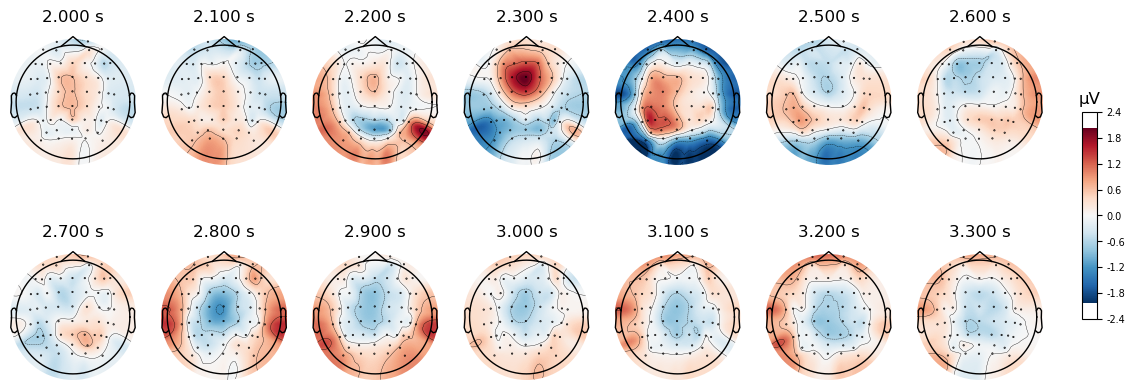

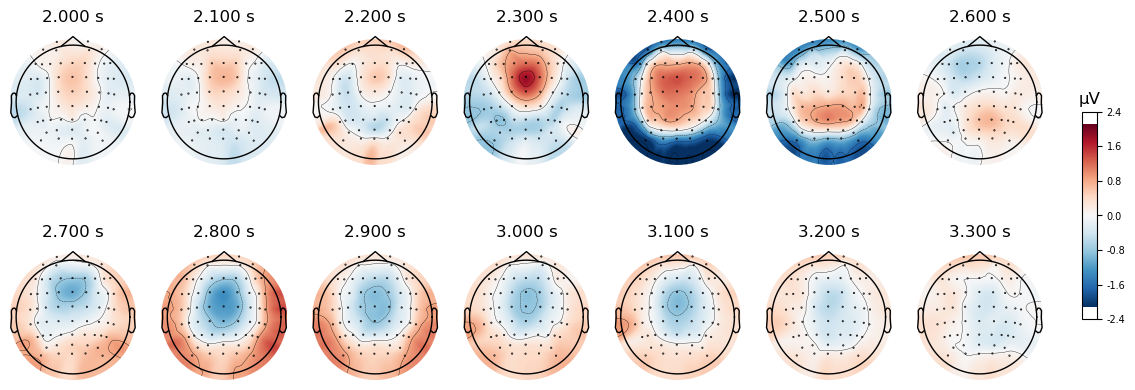

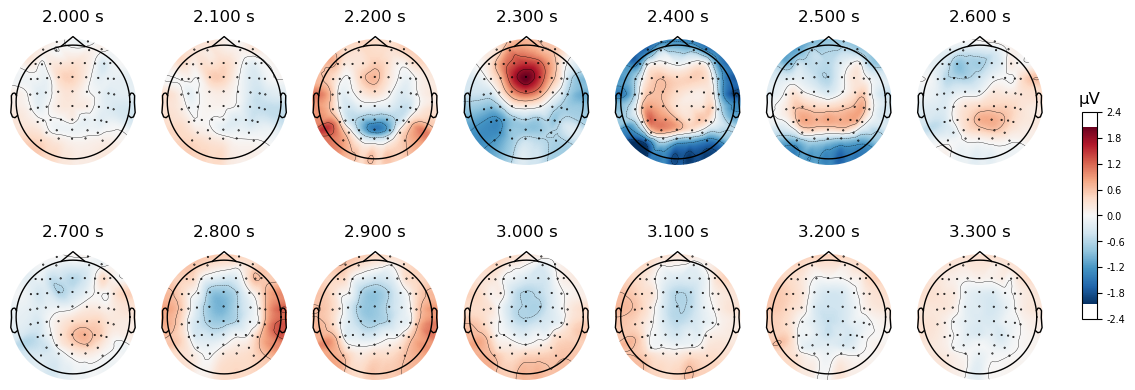

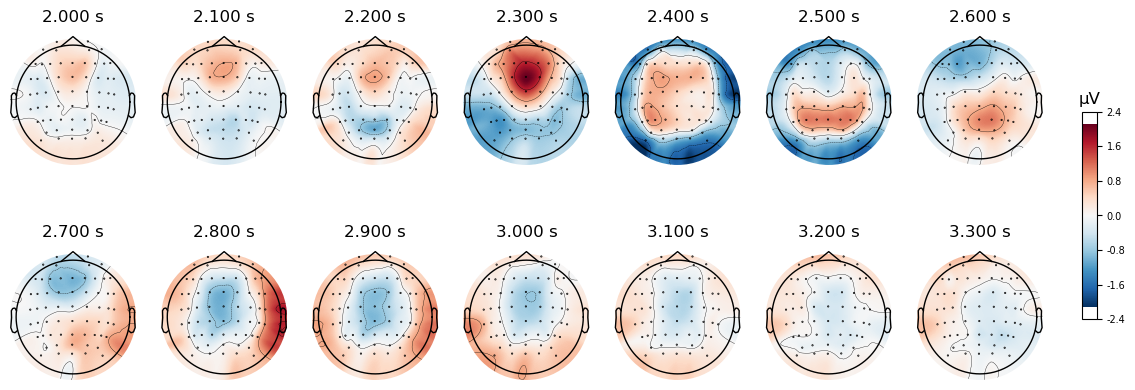

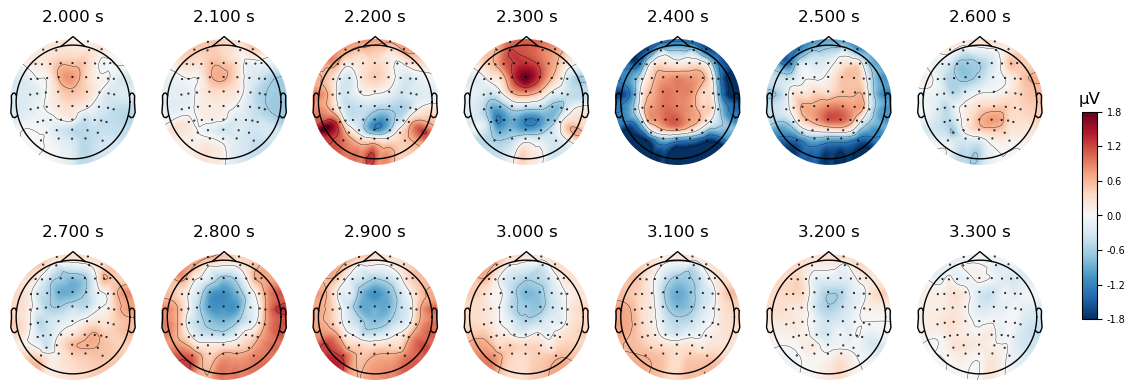

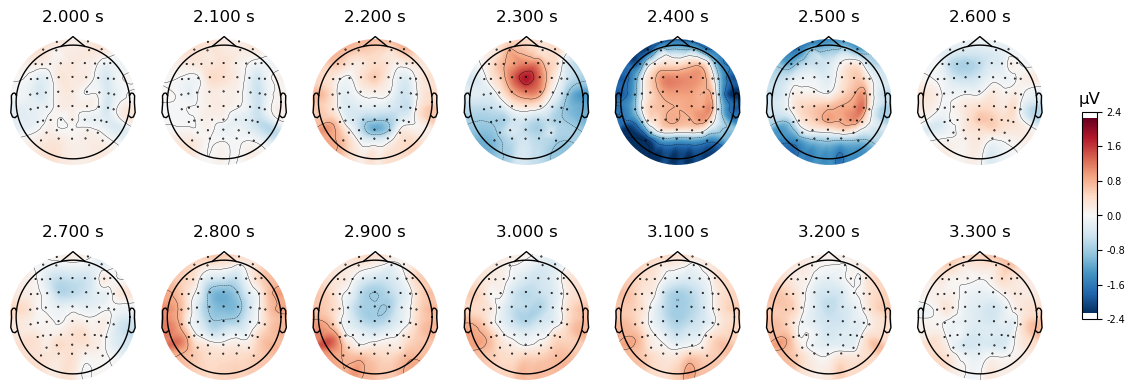

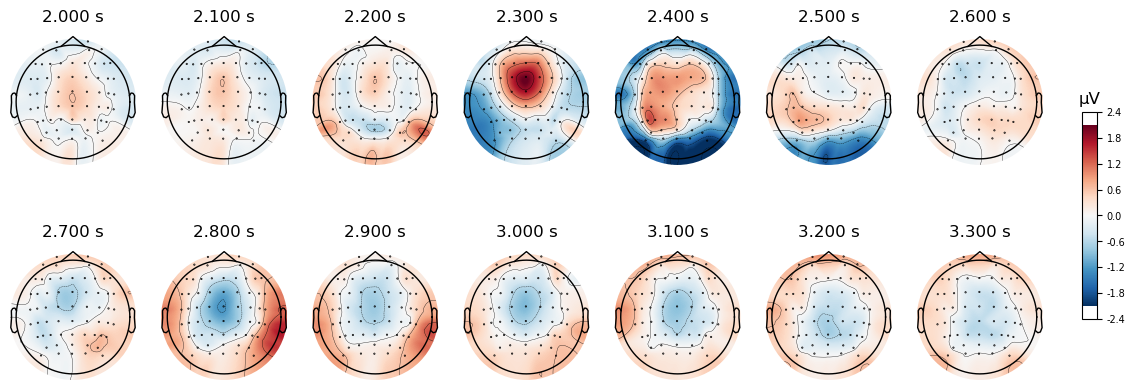

In [39]:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_cue_aligned_not_resampled', dst_fldr='2023_04_11_results_epoched_cue_aligned_figs_eyesub')

# Based on coefficient testing topoplot at 3.1s
times_of_interest = list(np.arange(2.0,3.4,0.1))

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], times=times_of_interest, ncols=7, activity=False)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'], times=times_of_interest, ncols=7, activity=False)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], times=times_of_interest, ncols=7, activity=False)

# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['top', 'bottom', 'left', 'right', 'center'], times=times_of_interest, ncols=7, activity=False)

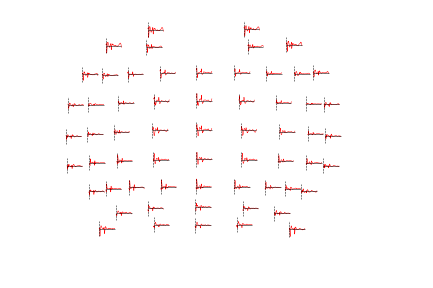

In [123]:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_cue_aligned_not_resampled', dst_fldr='2023_03_22_results_epoched_cue_aligned_figs_eyesub')

# Based on coefficient testing topoplot at 3.1s
times_of_interest = list(np.arange(2.0,3.4,0.1))

prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], plot_topo=True)

## 12.1. Movement-aligned

In [7]:
# Get source and destination path + create destintation folder if it does not exist.
# src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_lowpass_filtered', dst_fldr='2023_04_11_epoched_movement_aligned_25_resampled')

src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_05_24_lowpass', dst_fldr='2023_05_24_epoched_movement_aligned_not_resampled')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching movement-aligned for subject {subject}')

    # Epoch all raw files for the paradigm:
    prep.epoch_and_resample(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm', cue_aligned=False, resample=False)

print(f'Finished epoching, took me {round(time.time() - start)} seconds...')

Epoching movement-aligned for subject A01
Opening raw data file D:/Diplomarbeit_data/eeg/2023_05_24_lowpass/A01_paradigm_lowpass_filtered_raw.fif...
    Range : 1131211 ... 1928726 =   5656.055 ...  9643.630 secs
Ready.
Reading 0 ... 797515  =      0.000 ...  3987.575 secs...
Used Annotations descriptions: ['BTT-l', 'BTT-l_ct0', 'BTT-l_ct1', 'BTT-l_ib0', 'BTT-l_ib1', 'BTT-s', 'BTT-s_cc0', 'BTT-s_cc1', 'BTT-s_ib0', 'BTT-s_ib1', 'Break', 'Cue', 'LTR-l', 'LTR-l_cr0', 'LTR-l_cr1', 'LTR-l_il0', 'LTR-l_il1', 'LTR-s', 'LTR-s_cc0', 'LTR-s_cc1', 'LTR-s_il0', 'LTR-s_il1', 'RTL-l', 'RTL-l_cl0', 'RTL-l_cl1', 'RTL-l_ir0', 'RTL-l_ir1', 'RTL-s', 'RTL-s_cc0', 'RTL-s_cc1', 'RTL-s_ir0', 'RTL-s_ir1', 'Start', 'TTB-l', 'TTB-l_cb0', 'TTB-l_cb1', 'TTB-l_it0', 'TTB-l_it1', 'TTB-s', 'TTB-s_cc0', 'TTB-s_cc1', 'TTB-s_it0', 'TTB-s_it1', 'c c 0', 'c c 1', 'c l 0', 'c l 1', 'c r 0', 'c r 1', 'c t 0', 'c t 1']
Not setting metadata
352 matching events found
No baseline correction applied
0 projection items activated

In [31]:
# Plot movement-aligned grand average:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
# src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_movement_aligned_not_resampled', dst_fldr='2023_04_12_results_epoched_movement_aligned_figs_eyesub')

src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_05_19_temp_epoched_movement_aligned', dst_fldr='2023_05_19_temp_results_epoched_movement_aligned')


pvals = prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''])

# pvals = prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'])

# prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], p_ls=pvals)

# epochs = prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''])

# prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['top', 'bottom', 'left', 'right', 'center'])

times_of_interest = [-0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
times_of_interest = list(np.arange(-0.4,1.0,0.1))

# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], times=times_of_interest)

# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'], times=times_of_interest)

# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], times=times_of_interest)

Before testing
Done testing


In [57]:
# Plot movement-aligned grand average:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
# src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_movement_aligned_not_resampled', dst_fldr='temp2')
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_04_09_epoched_movement_aligned_very_short', dst_fldr='temp2')

avgs = prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'])

Before testing
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
Done testing


In [35]:
# Perfrom statistical test:
longs = avgs[0]
shorts = avgs[1]



In [44]:
import random
from scipy.stats import wilcoxon, ttest_ind

def perform_permutation_test(cond_1, cond_2, n_perm=1000):
    stats = []
    p_vals = []
    n1 = len(cond_1)
    n2 = len(cond_2)
    combined = cond_1 + cond_2
    for i in range(n_perm):
        # Randomly sample from cond_1 and cond_2
        random.shuffle(combined)

        samp_1 = combined[:n1]
        samp_2 = combined[n1:]

        _stat, _pval = ttest_ind(samp_1, samp_2)
        stats.append(_stat)
        p_vals.append(_pval)

    orig_stat, orig_p = ttest_ind(cond_1, cond_2)
    # print(orig_stat)
    # print(stats)
    # Sort stats:
    stats.sort()

    # Check how many values in stats are bigger than
    ids_above = [j for j in range(len(stats)) if stats[j] > orig_stat]

    # Get proporotion of idcs that are bigger than original statistic:
    p_actual = len(ids_above) / n_perm

    print(p_actual)
    return p_actual

from scipy.stats import wilcoxon

n_chan, n_times = avgs[0][0].shape

p_vals = np.zeros((n_chan, n_times))

for ch in range(n_chan):
    print(ch)
    for ts in range(n_times):
        long_to_test = []
        short_to_test = []
        for i in range(len(subjects)):
            long_to_test.append(longs[i][ch,ts])
            short_to_test.append(shorts[i][ch,ts])
        #res = wilcoxon(long_to_test, short_to_test)
        #p_vals[ch, ts] = res.pvalue

        p_vals[ch, ts] = perform_permutation_test(long_to_test, short_to_test)

0
0.814
0.843
0.823
0.858
0.829
0.835
0.843
0.858
0.845
0.853
0.862
0.843
0.852
0.86
0.86
0.854
0.853
0.879
0.866
0.846
0.848
0.846
0.867
0.821
0.83
0.829
0.809
0.814
0.848
0.842
0.815
0.828
0.848
0.825
0.811
0.823
0.841
0.834
0.823
0.812
0.817
0.821
0.811
0.809
0.781
0.754
0.789
0.742
0.724
0.715
0.716
0.706
0.705
0.683
0.656
0.649
0.652
0.622
0.648
0.64
0.616
0.614
0.633
0.641
0.576
0.612
0.625
0.626
0.611
0.636
0.626
0.609
0.591
0.597
0.639
0.631
0.601
0.637
0.621
0.596
0.592
0.619
0.644
0.598
0.582
0.597
0.593
0.595
0.596
0.574
0.578
0.576
0.548
0.579
0.524
0.559
0.545
0.541
0.515
0.517
0.519
0.479
0.484
0.439
0.436
0.404
0.42
0.395
0.382
0.372
0.364
0.343
0.355
0.343
0.328
0.329
0.32
0.295
0.337
0.324
0.311
0.298
0.342
0.334
0.316
0.336
0.342
0.373
0.368
0.372
0.419
0.428
0.462
0.513
0.516
0.557
0.636
0.651
0.706
0.709
0.752
0.799
0.805
0.847
0.857
0.862
0.905
0.885
0.898
0.898
0.906
0.898
0.907
0.912
0.887
0.901
0.885
0.878
0.873
0.861
0.829
0.838
0.84
0.826
0.811
0.78
0.797
0.74

KeyboardInterrupt: 

In [29]:
temp_p = p_vals[:,300:600]

C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:1175: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  squared = squared.reshape((1, n_chan, n_times))
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:1175: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  squared = squared.reshape((1, n_chan, n_times))
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:1175: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  squared = squared.reshape((1, n_chan, n_times))
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:1175: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  

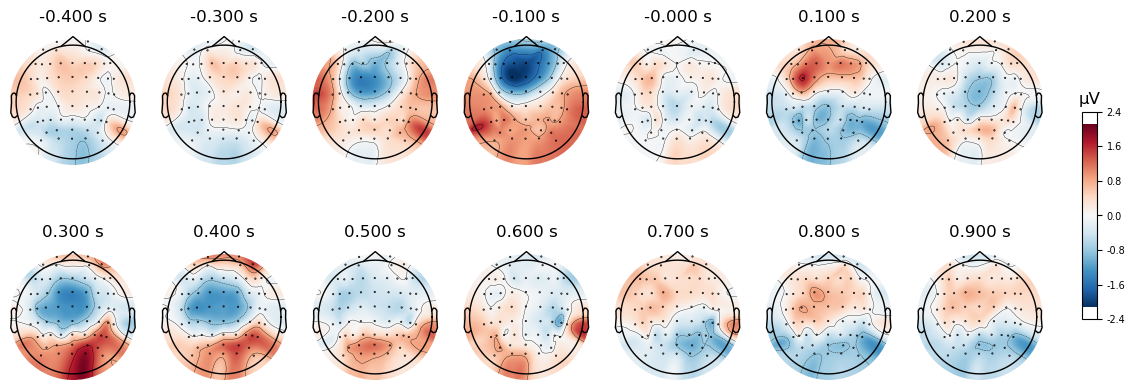

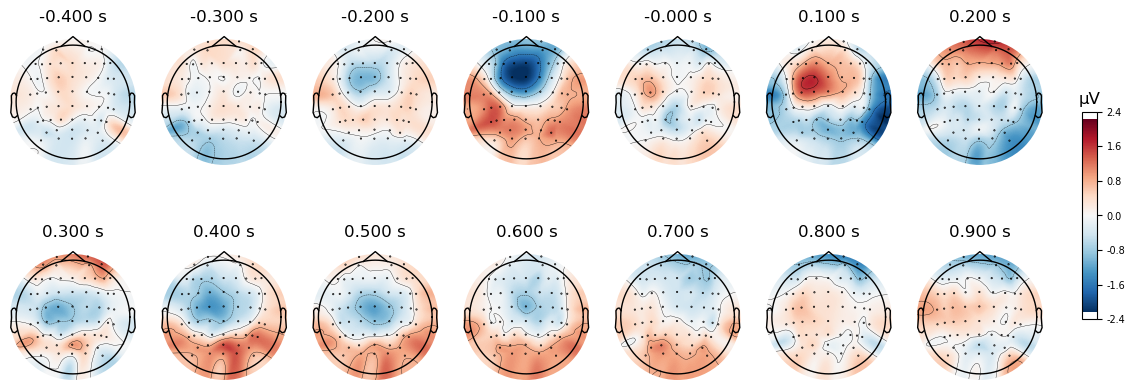

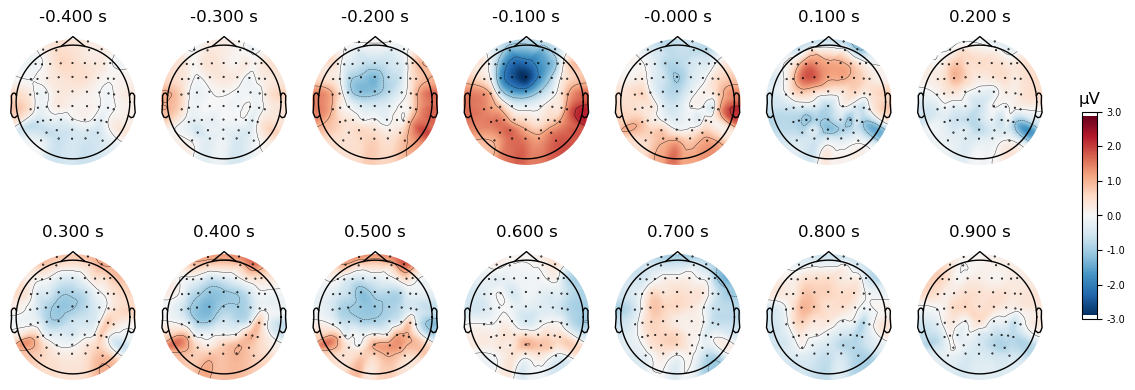

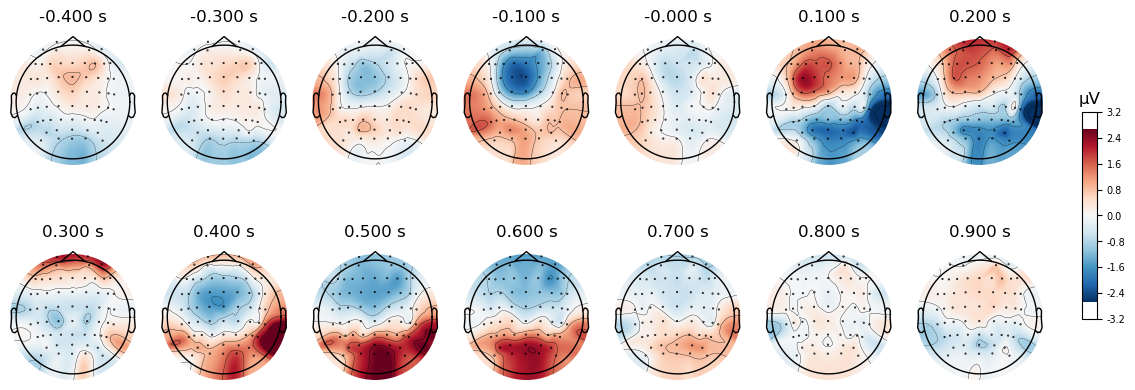

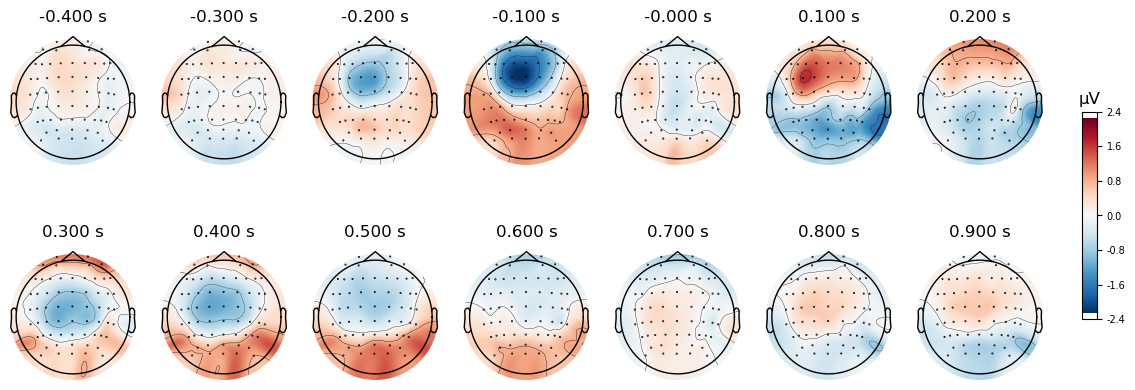

In [37]:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_movement_aligned_not_resampled', dst_fldr='2023_04_12_results_epoched_movement_aligned_figs_eyesub')

# Based on coefficient testing topoplot at 3.1s
times_of_interest = [0.0, 1.3]
times_of_interest = list(np.arange(-0.4,1.0,0.1))

# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], times=times_of_interest, ncols=7, activity=True)

# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'], times=times_of_interest, ncols=7, activity=True)

# prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], times=times_of_interest, ncols=7, activity=True)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['top', 'bottom', 'left', 'right', 'center'], times=times_of_interest, ncols=7, activity=False)

In [14]:
temp = np.array([[2, 3, 4], [5,6,7]])
temp = temp ** 2

In [33]:
import scipy
C = scipy.io.loadmat('C:/Users/peter/Documents/Code/master-thesis/03_analysis/dataframes/preprocessing/A01_C.mat')['C']

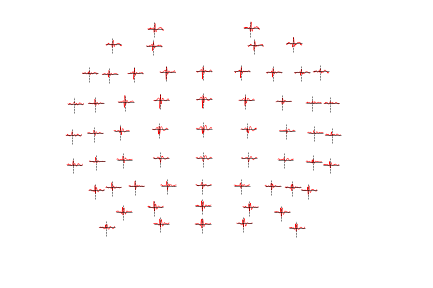

In [127]:
# Plot movement-aligned grand average:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_movement_aligned_not_resampled', dst_fldr='2023_03_22_results_epoched_movement_aligned_figs_eyesub')

epochs = prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], plot_topo=True)


# Get boxplot of long vs. short movment duration:

In [15]:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='2023_03_22_epoched_cue_aligned_not_resampled', dst_fldr='2023_03_22_results_epoched_movement_aligned_figs_eyesub')
long_durations = []
short_durations = []

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Reading all fif files for subject {subject}', end=' ')

    # There can be only one file  with matching conditions since we are splitting in folders:
    f_name = [f for f in os.listdir(src_path) if (subject in f) and ('paradigm' in f)][0]

    file = src_path + '/' + f_name
    epochs = mne.read_epochs(file, preload=True)

    sbj_long, sbj_short = prep.long_short_movement_duration(epochs.annotations)

    long_durations += sbj_long
    short_durations += sbj_short
    print()

print(f'Finished concatenating, took me {round(time.time() - start)} seconds...')





Reading all fif files for subject A01 
Reading all fif files for subject A02 
Reading all fif files for subject A03 
Reading all fif files for subject A04 
Reading all fif files for subject A05 
Reading all fif files for subject A06 
Reading all fif files for subject A07 
Reading all fif files for subject A08 
Reading all fif files for subject A09 
Reading all fif files for subject A10 
Finished concatenating, took me 4 seconds...


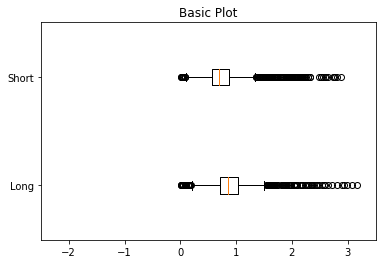

In [17]:
import matplotlib.pyplot as plt

data = [long_durations, short_durations]
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data, vert=False, labels=['Long', 'Short'])
ax1.set_xlim([-2.5,3.5])
fig1.savefig(f'{dst_path}/boxplot_movment_durations_long_v_short.png', dpi=400)

In [ ]:
# Get difference between cue onset and movement onset (*i*1):
trial_type_markers = ['LTR-s', 'LTR-l', 'RTL-s', 'RTL-l', 'TTB-s', 'TTB-l', 'BTT-s', 'BTT-l']
cue_times = []
release_times = []
touch_times = []
for i, entry in enumerate(epochs.annotations.description):
    if entry in trial_type_markers:
        if 'bad' in epochs.annotations.description[i+1]:
            continue
        else:
            # Get delay between cue which is 'Cue' at i+3 and ix1 at i+4 and cx0 at i+5
            cue_times.append(epochs.annotations.onset[i+3])
            release_times.append(epochs.annotations.onset[i+4])
            touch_times.append(epochs.annotations.onset[i+5])


In [ ]:
import numpy as np
diff_cue_release = np.array(release_times) - np.array(cue_times)
diff_release_touch = np.array(touch_times) - np.array(release_times)

In [ ]:
bins=np.arange(epochs.tmin, epochs.tmax, 1/epochs.info['sfreq'])
hist = np.histogram(diff_cue_release, bins=bins, range=None)

In [ ]:
kernel = gauss(n=55, b=0.04*epochs.info['sfreq'])

smoothed = np.convolve(hist[0], kernel, 'same')
x = np.arange(epochs.tmin, epochs.tmax+1/epochs.info['sfreq'], 1/epochs.info['sfreq'])
plt.plot(smoothed)
plt.show()

In [ ]:
def gauss(n=11,b=0.04):
    r = range(-int(n/2),int(n/2)+1)
    return [np.exp(-float(x)**2/(2*b**2)) for x in r]

In [ ]:
import matplotlib.pyplot as plt

plt.plot(smoothed)
plt.show()

In [ ]:
epochs.tmax

In [ ]:
trial_type_markers = ['LTR-s', 'LTR-l', 'RTL-s', 'RTL-l', 'TTB-s', 'TTB-l', 'BTT-s', 'BTT-l']
for i, entry in enumerate(descriptions):
    if entry in trial_type_markers:
        if 'bad' in descriptions[i+1]:
            continue
        else:
            trial_type = entry
            period = 'i'  # indication
            position = descriptions[i+2][2]
            state = descriptions[i+2][4]

            descriptions[i+2] = trial_type + '_' + period + position + state

            trial_type = entry
            period = 'i'  # indication
            position = descriptions[i+4][2]
            state = descriptions[i+4][4]

            descriptions[i+4] = trial_type + '_' + period + position + state

            trial_type = entry
            period = 'c'  # cue
            position = descriptions[i+5][2]
            state = descriptions[i+5][4]

            descriptions[i+5] = trial_type + '_' + period + position + state

            trial_type = entry
            period = 'c'  # cue
            position = descriptions[i+7][2]
            state = descriptions[i+7][4]

            descriptions[i+7] = trial_type + '_' + period + position + state

return descriptions